<div align="center">
    
# <font size="4">**YOUTHRIVE DATA SCIENCE CAPSTONE PROJECT**</font>
# <font size="4">**TOPIC:**</font>
# <font size="4">**INCOME LEVEL PREDICTION**</font>
### <font size="4">**BY:**</font>  
### <font size="4">**AJIGIRI TERNA MARCELLENUS**</font>
</div>

## **1.0 Introduction**
Income prediction has become increasingly significant in today's data-driven world, where understanding economic disparities is crucial for policymakers, businesses, and researchers alike. This project focuses on predicting whether an individual's income exceeds $50K per year based on various features derived from census data. The terms "income prediction" and "machine learning" are pivotal in this context. Income prediction refers to the use of statistical and computational methods to estimate the income level of individuals, while machine learning involves the development of algorithms that enable computers to learn from and make predictions based on data.

In this project, we will explore various machine learning models, including Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. Each model has unique strengths and weaknesses, making it essential to evaluate their performance to determine the most effective approach for income level prediction. By analyzing the results, we aim to identify the model that offers the best accuracy and robustness.

### **1.1 Aim**
The primary aim of this project is to develop a machine learning model that accurately predicts whether a person's income exceeds $50K per year based on census data.

### **1.1.2 Objectives**
- To explore the provided dataset and perform necessary data cleaning and preprocessing.
- To engineer relevant features that can enhance the model's predictive power.
- To evaluate multiple machine learning models to identify the one with the best performance in terms of accuracy and other metrics.
- To derive insights from the data and provide recommendations for future predictions.

# Importing Libraries

In [312]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import  matplotlib.pyplot as plt
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
sns.set(style='white', context='notebook', palette='deep')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

## **1. Data Collection and Importation**
1. **Importation of income_data Dataset** 

In [313]:
#Loading income_data for Analysis 
data1=pd.read_csv("income_data_1.csv")

## **a. Dataset Inspection**

In [314]:
#Inspecting the 5 random rows of income_data dataset
data1.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [315]:
#Check for Null Data
data1.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# Review income_data Dataset Datatype

In [316]:
#Get Data types
data1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [317]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Categorical Features

In [318]:
#Identifying Categorical Features
cat_feat = data1.select_dtypes(include=['object']).columns
print(f"CATEGORICAL FEATURES:       {cat_feat}")

CATEGORICAL FEATURES:       Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


# Numerical Features

In [319]:
#Identifying Numerical Features
num_feat = data1.select_dtypes(include=['int64']).columns
print(f"NUMERICAL FEATURES:     {num_feat}")

NUMERICAL FEATURES:     Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


# Check for the sum of Duplicated Rows 

In [320]:
data1.duplicated().sum()

48

# Dropping Duplicated Rows

In [321]:
data1=data1.drop_duplicates()
data1.shape

(48794, 15)

# Basic Statistics for Numerical Values :

In [322]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48794.0,38.651474,13.708757,17.0,28.0,37.0,48.00,90.0
fnlwgt,48794.0,189668.753002,105617.142346,12285.0,117555.0,178138.5,237606.25,1490400.0
education-num,48794.0,10.078862,2.569975,1.0,9.0,10.0,12.00,16.0
capital-gain,48794.0,1080.129135,7455.606716,0.0,0.0,0.0,0.00,99999.0
capital-loss,48794.0,87.588392,403.193381,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48794.0,40.426056,12.392297,1.0,40.0,40.0,45.00,99.0


# Exploratory Data Analysis

In [323]:
print(f"Ratio above 50k : {(data1['income'] == '>50K').astype('int').sum() / data1.shape[0] * 100 :.2f}%")

Ratio above 50k : 23.94%


# Plotting a Pairwise Relationships

<Figure size 1600x1000 with 0 Axes>

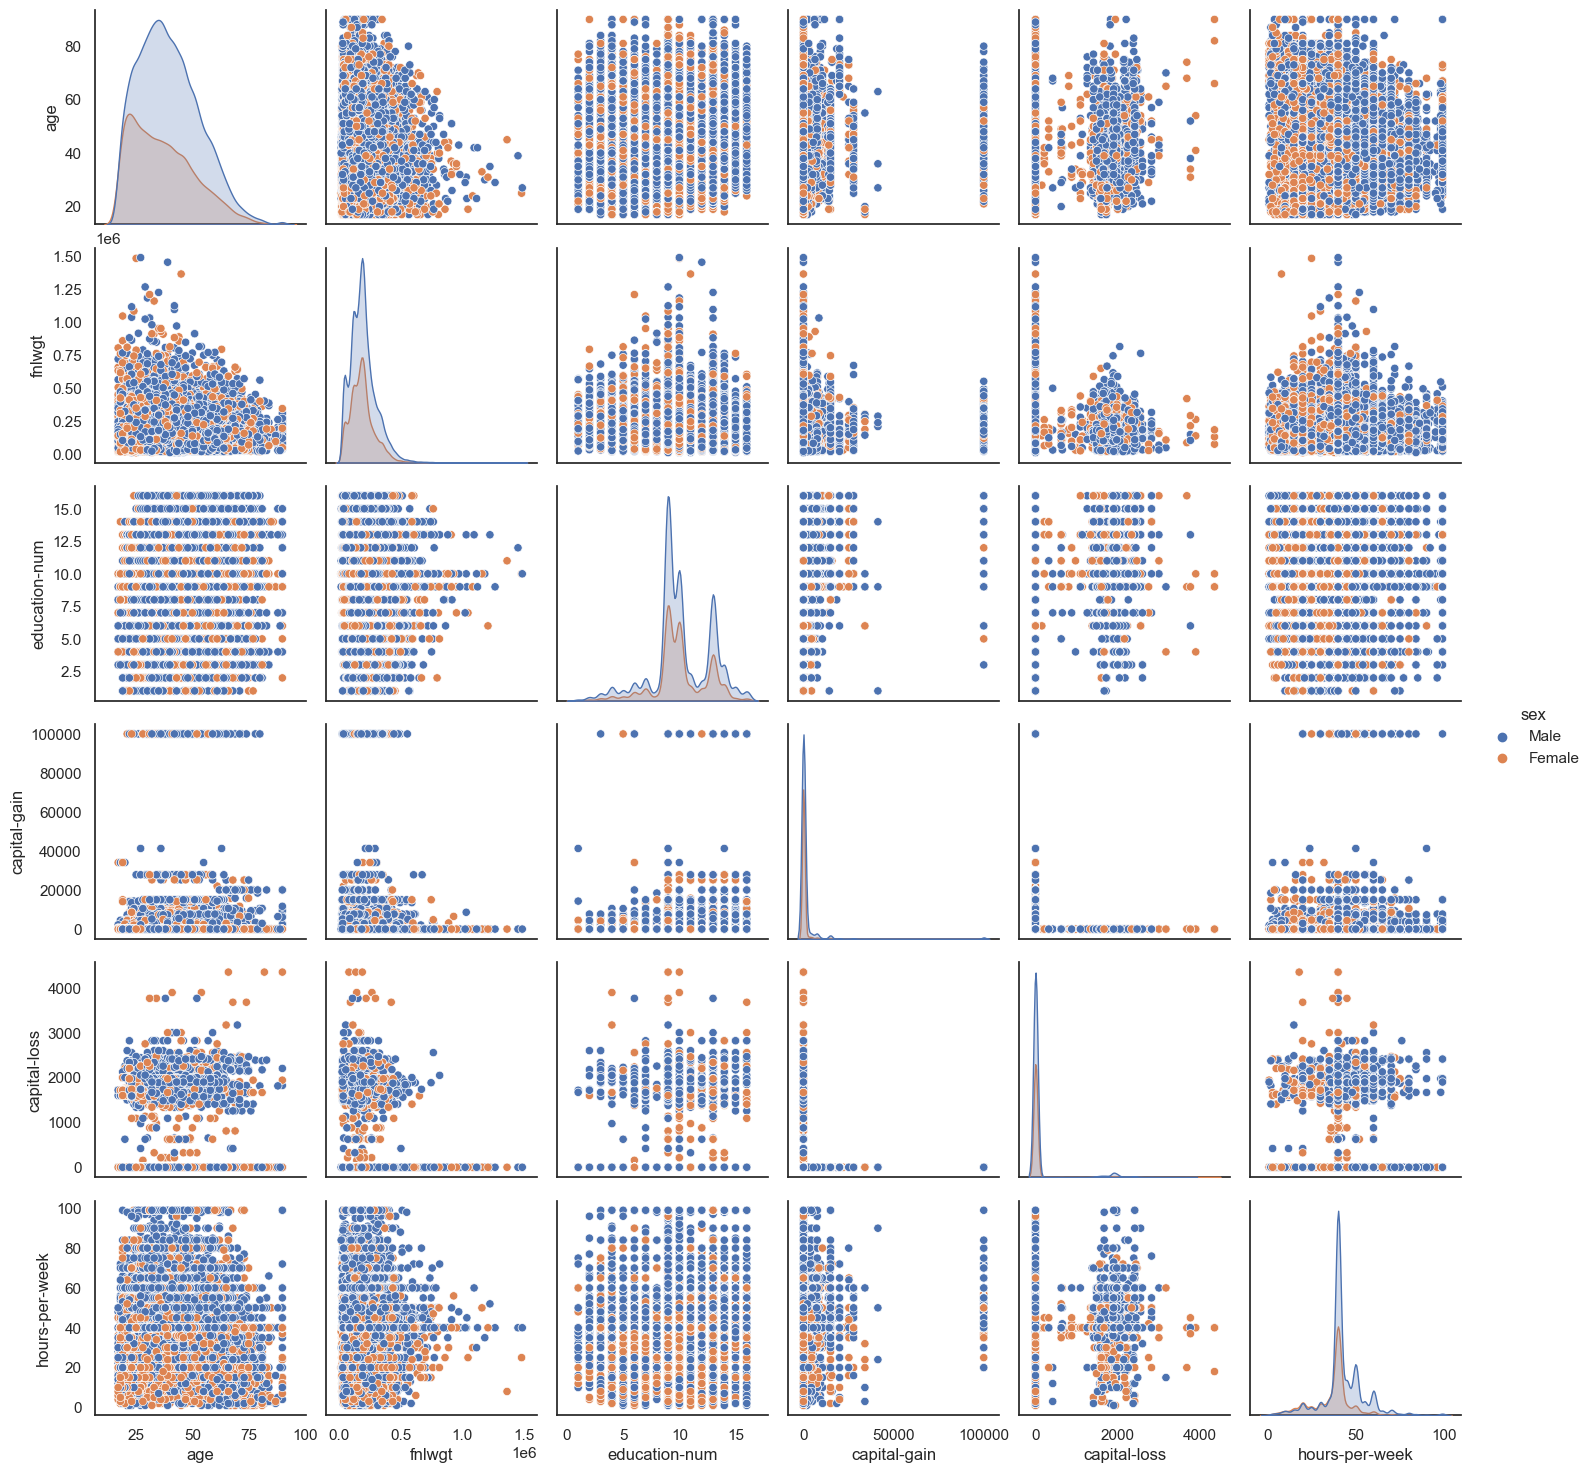

In [324]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=data1, hue='sex')
plt.show()

# Distribution of Numerical values

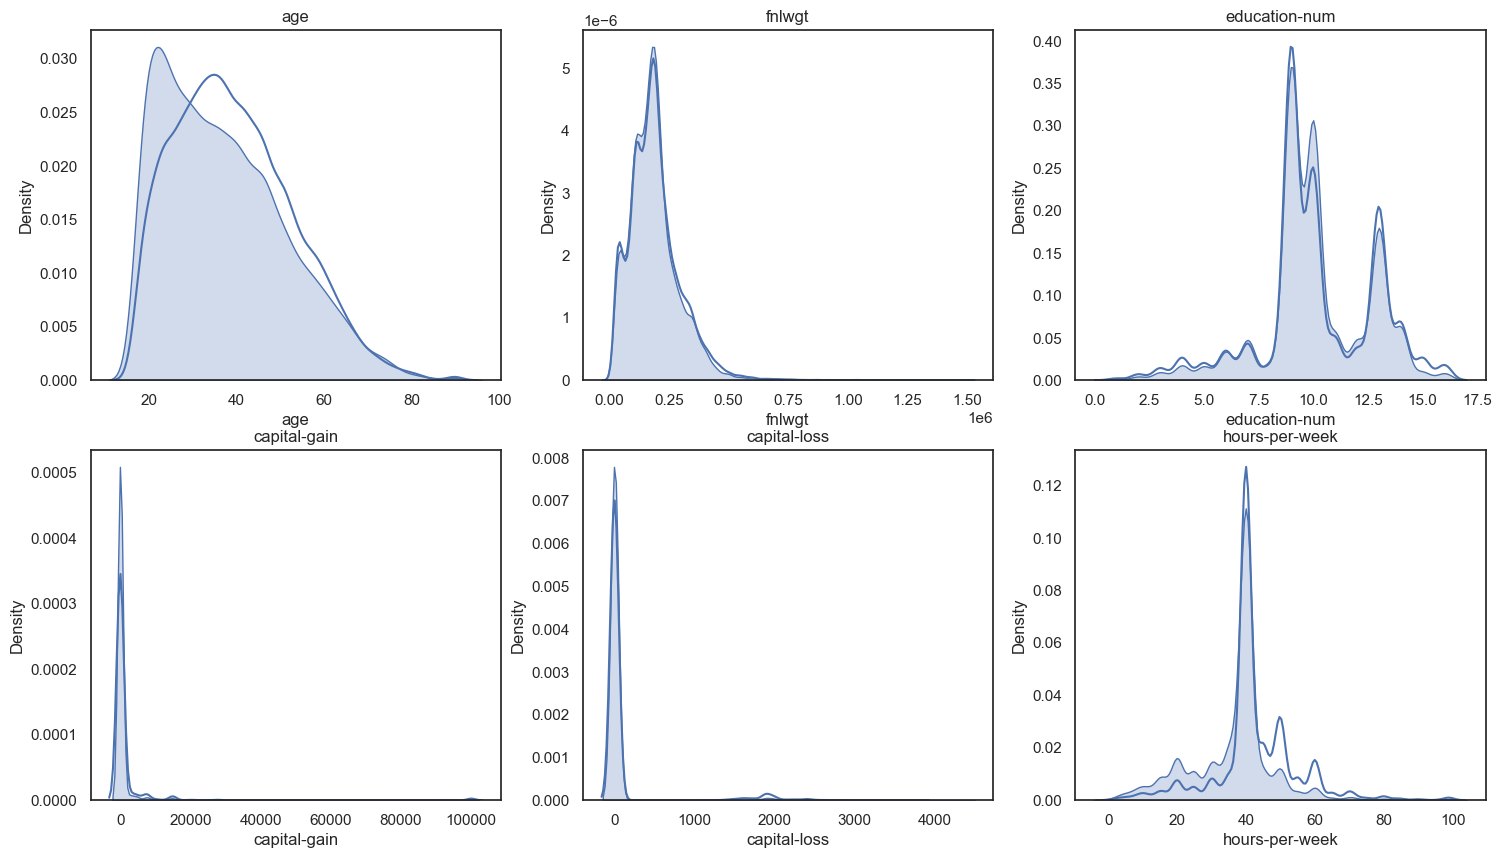

In [325]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(data1[data1['sex'] == 'Female'][c], shade=True, )
    sns.kdeplot(data1[data1['sex'] == 'Male'][c], shade=False)
    plt.title(c)

plt.show()

# There are significant differences when it comes to capital gain / loss and hours per week.

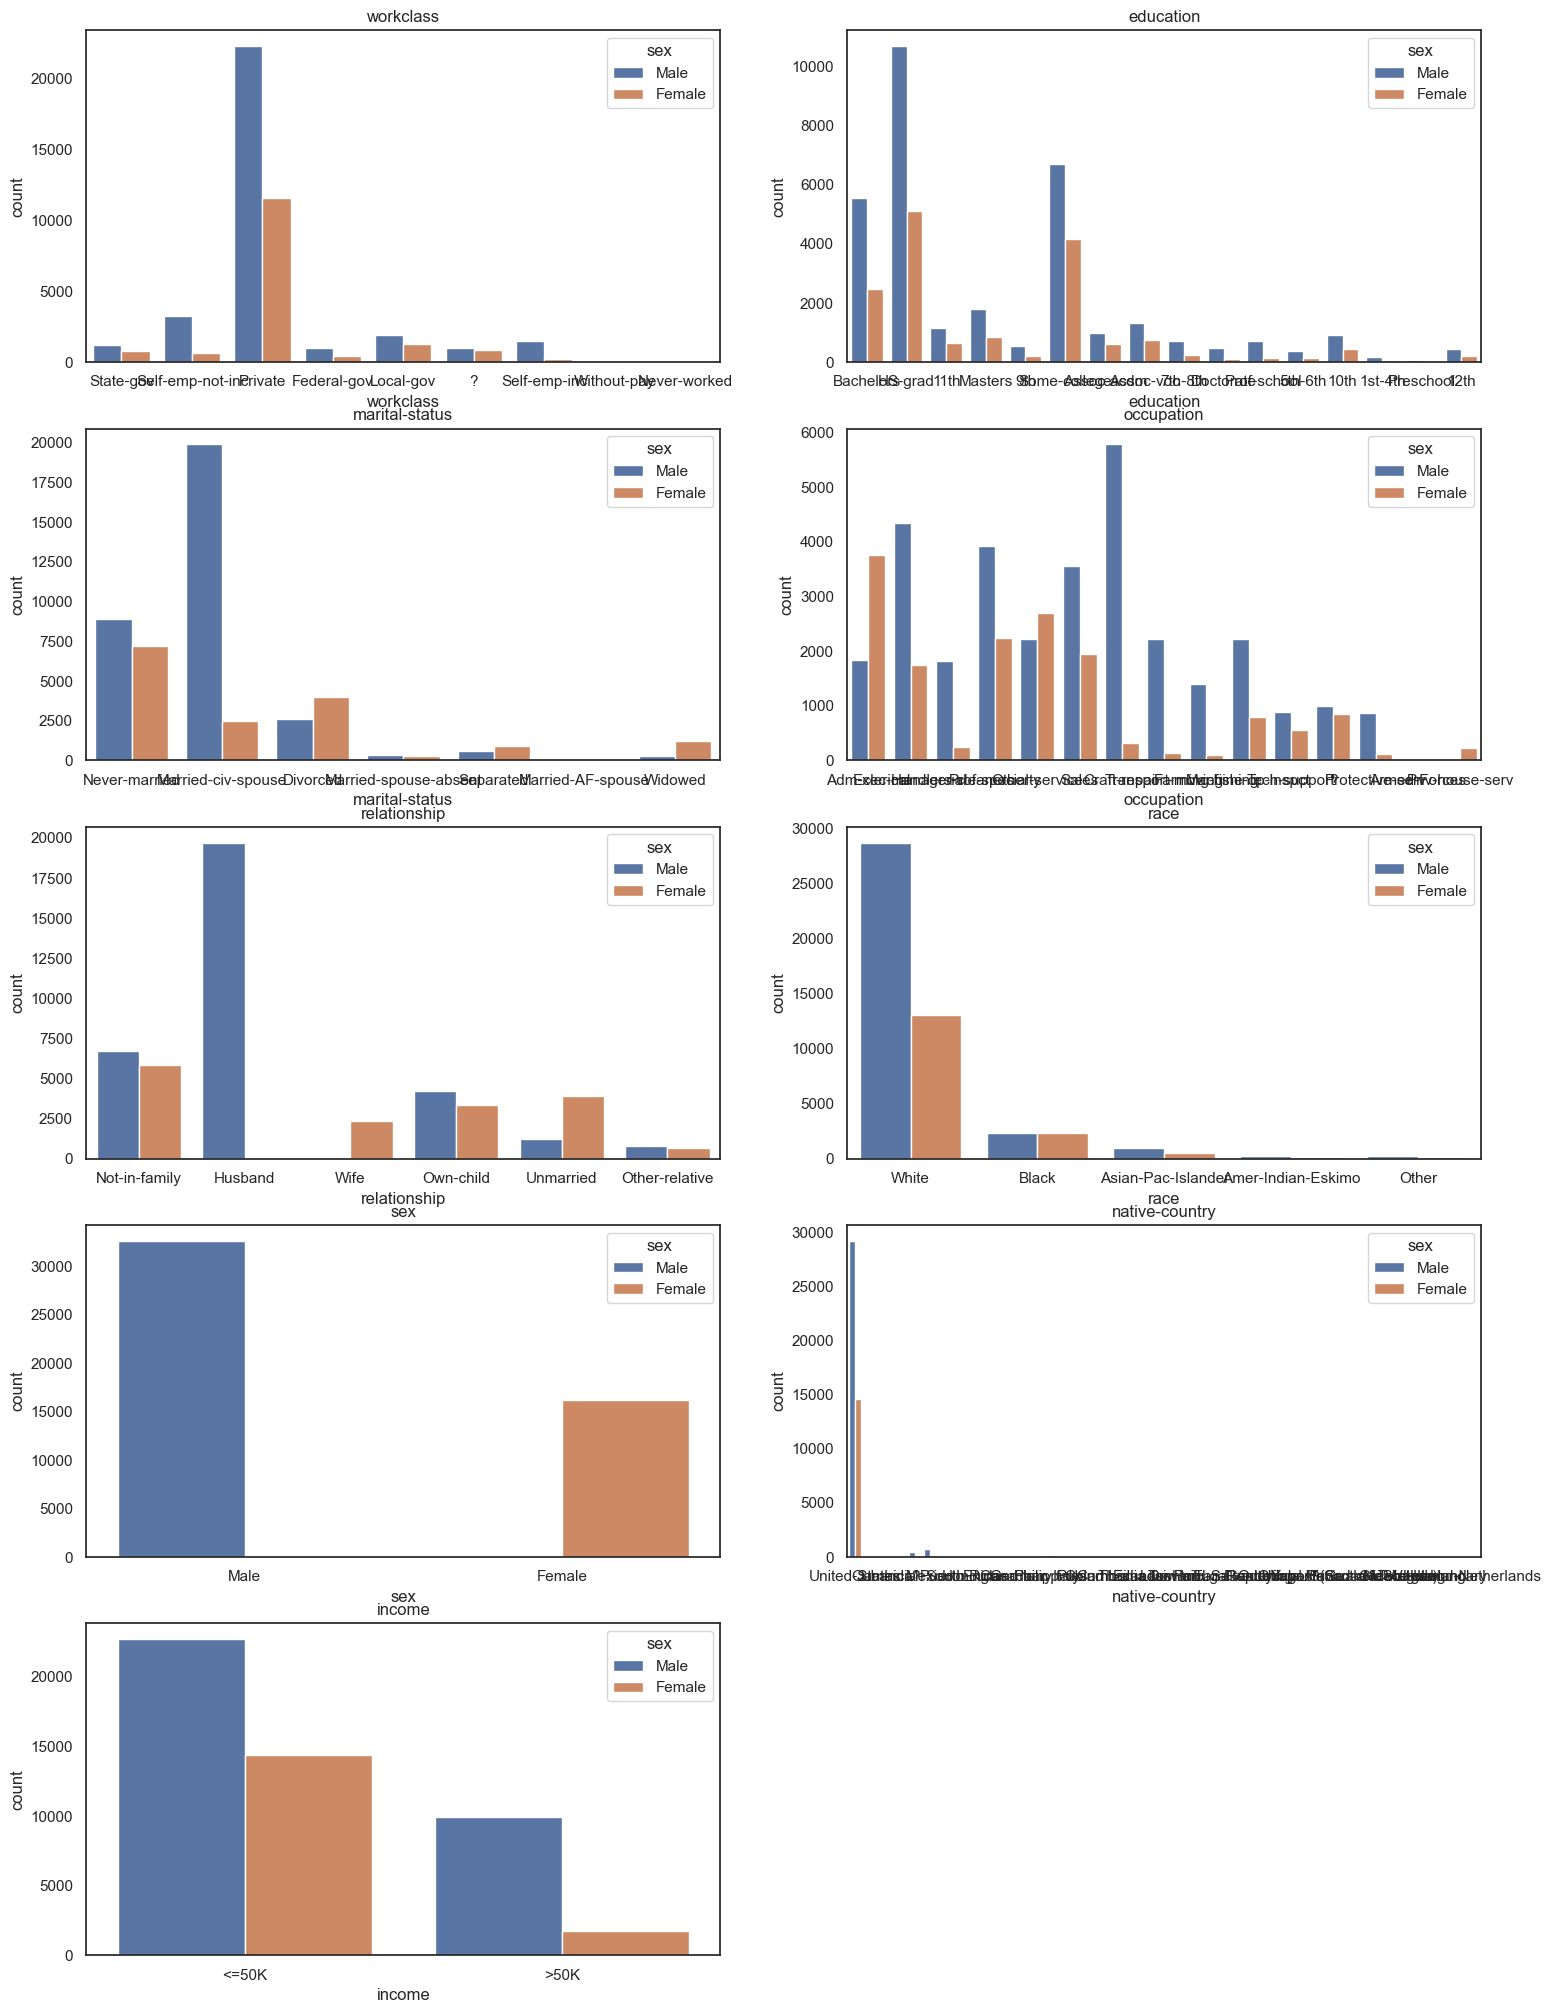

In [326]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=data1, hue='sex')
    plt.title(c)

plt.show()

# There are far more male earning >50k than female, but at the same time there are also more male earning <50k and even more males recorded in general. The counts need to be normalized.

In [327]:
#Number of Female/Male
nb_female = (data1.sex == 'Female').astype('int').sum()
nb_male = (data1.sex == 'Male').astype('int').sum()
nb_female, nb_male

(16177, 32617)

In [328]:
# nb of people earning more or less than 50k per gender
nb_male_above = len(data1[(data1.income == '>50K') & (data1.sex == 'Male')])
nb_male_below = len(data1[(data1.income == '<=50K') & (data1.sex == 'Male')])
nb_female_above = len(data1[(data1.income == '>50K') & (data1.sex == 'Female')])
nb_female_below = len(data1[(data1.income == '<=50K') & (data1.sex == 'Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(9912, 22705, 1769, 14408)

In [329]:
print(f'Among Males   : {nb_male_above/nb_male*100:.0f}% earn >50K // {nb_male_below/nb_male*100:.0f}% earn <=50K')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50K // {nb_female_below/nb_female*100:.0f}% earn <=50K')

Among Males   : 30% earn >50K // 70% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [330]:
# normalization
nb_male_above /= nb_male 
nb_male_below /= nb_male
nb_female_above /= nb_female
nb_female_below /= nb_female
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(0.3038906091915259,
 0.6961093908084741,
 0.10935278481795141,
 0.8906472151820486)

In [331]:
print(f'Among people earning >50K  : {nb_male_above / (nb_male_above + nb_female_above) *100 :.0f}% are Females and {nb_female_above / (nb_male_above + nb_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50K : {nb_male_below / (nb_male_below + nb_female_below) *100 :.0f}% are Females and {nb_female_below / (nb_male_below + nb_female_below) *100 :.0f}% are Males')

Among people earning >50K  : 74% are Females and 26% are Males
Among people earning =<50K : 44% are Females and 56% are Males


# Correlation

In [332]:
corr = data1[num_feat].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076454,0.030618,0.077194,0.056855,0.071210
fnlwgt,-0.076454,1.000000,-0.038759,-0.003714,-0.004377,-0.013543
education-num,0.030618,-0.038759,1.000000,0.125214,0.080980,0.143931
capital-gain,0.077194,-0.003714,0.125214,1.000000,-0.031473,0.082150
capital-loss,0.056855,-0.004377,0.080980,-0.031473,1.000000,0.054427
hours-per-week,0.071210,-0.013543,0.143931,0.082150,0.054427,1.000000


In [333]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [334]:
print(x)

[[39 'State-gov' 77516 ... 0 40 'United-States']
 [50 'Self-emp-not-inc' 83311 ... 0 13 'United-States']
 [38 'Private' 215646 ... 0 40 'United-States']
 ...
 [38 'Private' 374983 ... 0 50 'United-States']
 [44 'Private' 83891 ... 0 40 'United-States']
 [35 'Self-emp-inc' 182148 ... 0 60 'United-States']]


In [288]:
print(y)

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


### **PCA for Dimensionality Reduction**

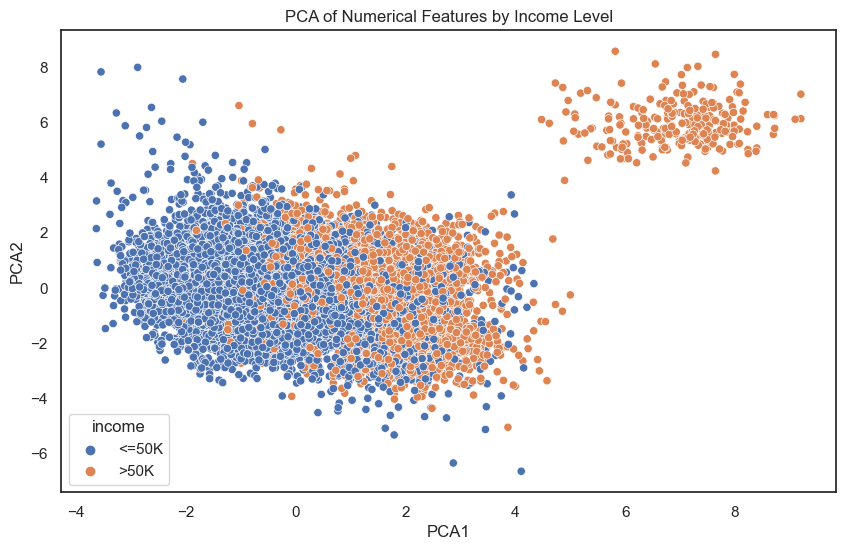

In [335]:
# Standardize the data
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaled_data = StandardScaler().fit_transform(data1[num_feat])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataframe
data1['PCA1'] = pca_result[:, 0]
data1['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA components by income level
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='income', data=data1)
plt.title('PCA of Numerical Features by Income Level')
plt.show()

# Data preprocessing

In [336]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputer.fit(x[:,1:])
x[:,1:]= imputer.transform(x[:,1:])

# Label Encoding (Seperate Categorization)

In [337]:
label_1 =LabelEncoder()
label_3 =LabelEncoder()
label_5 =LabelEncoder()
label_6 =LabelEncoder()
label_7 =LabelEncoder()
label_8 =LabelEncoder()
label_9 =LabelEncoder()
label_13 =LabelEncoder()
label_income=LabelEncoder()
x[:,1] =label_1.fit_transform(x[:,1])
x[:,3] =label_1.fit_transform(x[:,3])
x[:,5] =label_1.fit_transform(x[:,5])
x[:,6] =label_1.fit_transform(x[:,6])
x[:,7] =label_1.fit_transform(x[:,7])
x[:,8] =label_1.fit_transform(x[:,8])
x[:,9] =label_1.fit_transform(x[:,9])
x[:,13] =label_1.fit_transform(x[:,13])
y=label_income.fit_transform(y)

In [338]:
print(x)

[[39 7 77516 ... 0 40 39]
 [50 6 83311 ... 0 13 39]
 [38 4 215646 ... 0 40 39]
 ...
 [38 4 374983 ... 0 50 39]
 [44 4 83891 ... 0 40 39]
 [35 5 182148 ... 0 60 39]]


In [339]:
print(y)

[0 0 0 ... 0 0 1]


# Splitting Dataset into Training set and Testing set

In [341]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [342]:
print(X_train)

[[48 4 107231 ... 0 50 39]
 [41 4 66118 ... 0 40 39]
 [23 4 192978 ... 0 40 39]
 ...
 [24 4 311826 ... 0 18 39]
 [63 4 114011 ... 0 40 39]
 [25 4 186925 ... 0 48 39]]


In [343]:
print(X_test)

[[31 4 408208 ... 0 30 39]
 [57 4 27459 ... 0 40 39]
 [65 6 538099 ... 0 30 39]
 ...
 [38 1 172571 ... 0 40 39]
 [60 0 188236 ... 0 40 39]
 [43 6 126320 ... 0 40 39]]


In [344]:
print(Y_train)

[1 0 0 ... 0 0 0]


In [345]:
print(Y_test)

[0 0 0 ... 1 0 1]


# Feature Scaling

In [346]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [347]:
print(X_train)

[[ 0.68307117  0.04013684 -0.78007985 ... -0.21831562  0.76913887
   0.28059239]
 [ 0.17202929  0.04013684 -1.1685584  ... -0.21831562 -0.03651716
   0.28059239]
 [-1.14207841  0.04013684  0.03014733 ... -0.21831562 -0.03651716
   0.28059239]
 ...
 [-1.06907242  0.04013684  1.15314732 ... -0.21831562 -1.80896041
   0.28059239]
 [ 1.77816092  0.04013684 -0.71601533 ... -0.21831562 -0.03651716
   0.28059239]
 [-0.99606644  0.04013684 -0.02704773 ... -0.21831562  0.60800766
   0.28059239]]


In [348]:
print(X_test)

[[-0.55863478  0.02636956  2.09080074 ... -0.21290784 -0.83805474
   0.27373697]
 [ 1.33187347  0.02636956 -1.54398846 ... -0.21290784 -0.0257694
   0.27373697]
 [ 1.91356831  1.51388689  3.33079455 ... -0.21290784 -0.83805474
   0.27373697]
 ...
 [-0.04965179 -2.20490644 -0.15868861 ... -0.21290784 -0.0257694
   0.27373697]
 [ 1.55000903 -2.94866511 -0.00914397 ... -0.21290784 -0.0257694
   0.27373697]
 [ 0.31390749  1.51388689 -0.60022    ... -0.21290784 -0.0257694
   0.27373697]]


# MODEL TRAING, TESTING AND PREDICTIONS ON income_data
-     Metrics to Evaluate Models(confusion matrix, accuracy score,classification_report, roc_auc)

# Training and Testing income_data on Decision Tree Classifier Model

Decision Tree Classifier Confusion Matrix
[[6462  949]
 [ 949 1399]]

 Decision Tree  Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7411
           1       0.60      0.60      0.60      2348

    accuracy                           0.81      9759
   macro avg       0.73      0.73      0.73      9759
weighted avg       0.81      0.81      0.81      9759



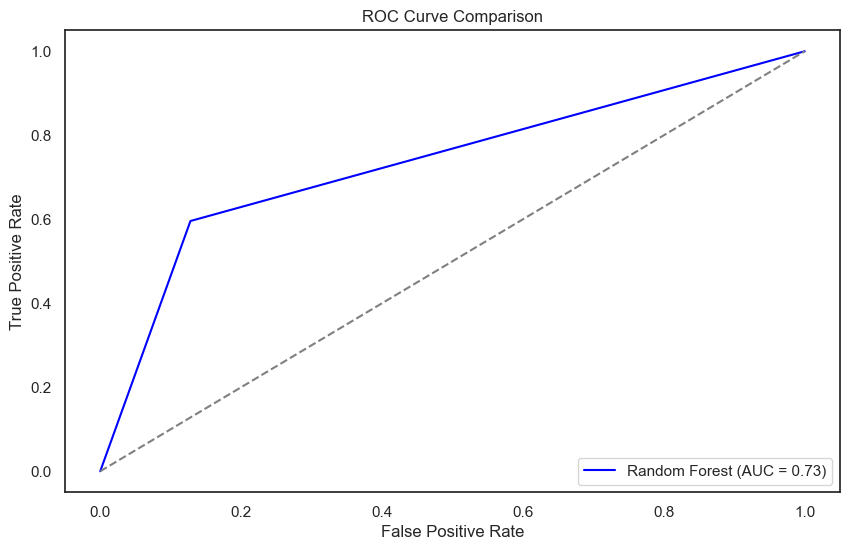


Random Forest ROC-AUC: 73%


In [349]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

#Confusion Metrics of Decision tree Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = dt_model.predict(X_test)
cm_dt = confusion_matrix(Y_test,y_pred)
print("Decision Tree Classifier Confusion Matrix")
print(cm_dt)
print("======================")

#Random Forest classification_report
print("\n Decision Tree  Classification Report:\n", classification_report(Y_test,y_pred))

# ROC Curve and AUC Score for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for Decision Tree Classifier
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_proba_dt)

roc_auc_dt = roc_auc_score(Y_test, y_proba_dt)


# Step 9: Plot the ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f"Random Forest (AUC = {roc_auc_dt:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


# Step 10: Display AUC scores
print(f"\nRandom Forest ROC-AUC: {roc_auc_dt:.0%}")

# Model training and predictions

# Training Dataset on Random Forest Classifier

Random Forest Confusion Matrix
[[6887  524]
 [ 912 1436]]

 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7411
           1       0.73      0.61      0.67      2348

    accuracy                           0.85      9759
   macro avg       0.81      0.77      0.79      9759
weighted avg       0.85      0.85      0.85      9759



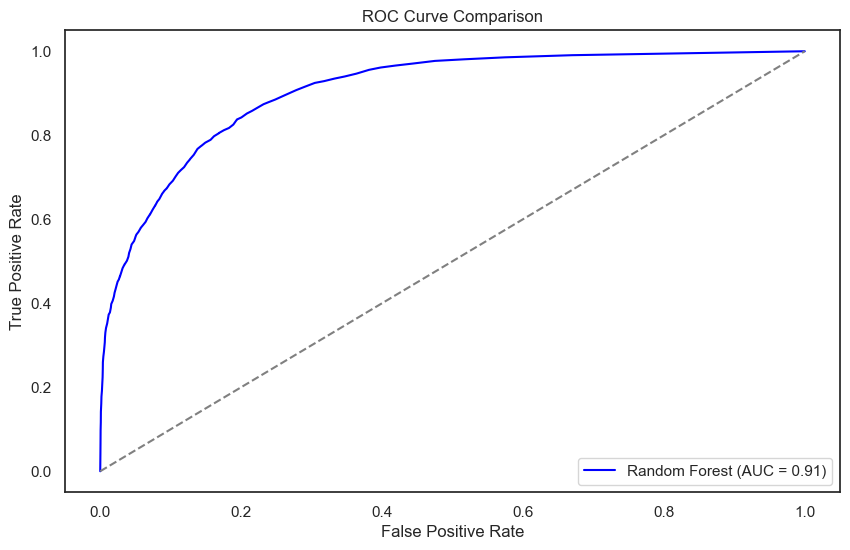


Random Forest ROC-AUC: 87%


In [350]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

#Confusion Metrics of Random Forest 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = rf_model.predict(X_test)
cm_rf = confusion_matrix(Y_test,y_pred)
print("Random Forest Confusion Matrix")
print(cm_rf)
print("=====================")


#Random Forest classification_report
print("\n Random Forest Classification Report:\n", classification_report(Y_test,y_pred))

# ROC Curve and AUC Score for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for each model
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_proba_rf)

roc_auc_rf = roc_auc_score(Y_test, y_proba_rf)


# Step 9: Plot the ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


# Step 10: Display AUC scores
print(f"\nRandom Forest ROC-AUC: {roc_auc_xgb:.0%}")

# Training Dataset on XGBClassifier

XGBOOST Confusion Matrix
[[7175  236]
 [1358  990]]

 XGBOOST Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      7411
           1       0.81      0.42      0.55      2348

    accuracy                           0.84      9759
   macro avg       0.82      0.69      0.73      9759
weighted avg       0.83      0.84      0.82      9759



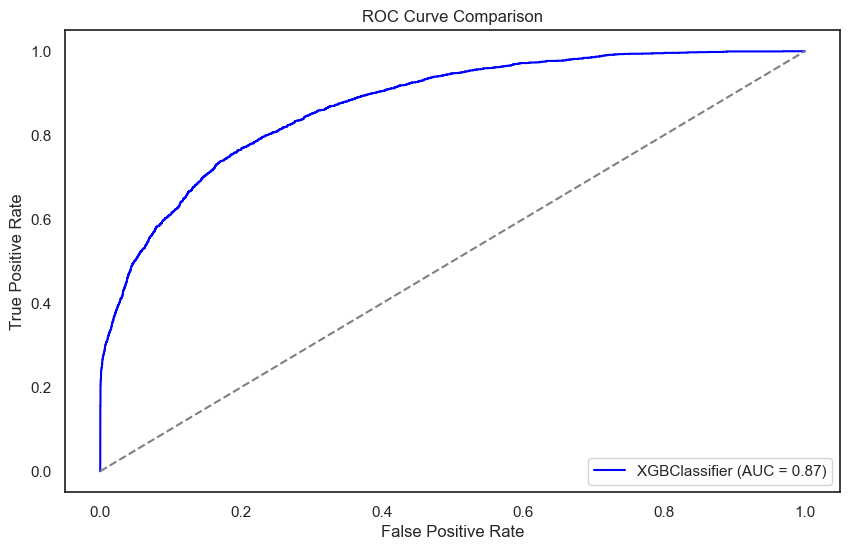


XGBOOST ROC-AUC: 87%


In [351]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,Y_train)

#Confusion Metrics for XGBClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(Y_test,y_pred)
print("XGBOOST Confusion Matrix")
print(cm_xgb)
print("=====================")


#XGBClassifier classification_report
print("\n XGBOOST Classification Report:\n", classification_report(Y_test,y_pred))

# ROC Curve and AUC Score for XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for each model
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_proba_xgb)

roc_auc_xgb = roc_auc_score(Y_test, y_proba_xgb)

# Step 9: Plot the ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f"XGBClassifier (AUC = {roc_auc_xgb:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


# Step 10: Display AUC scores
print(f"\nXGBOOST ROC-AUC: {roc_auc_xgb:.0%}")


# **Confusion matrices for each model**

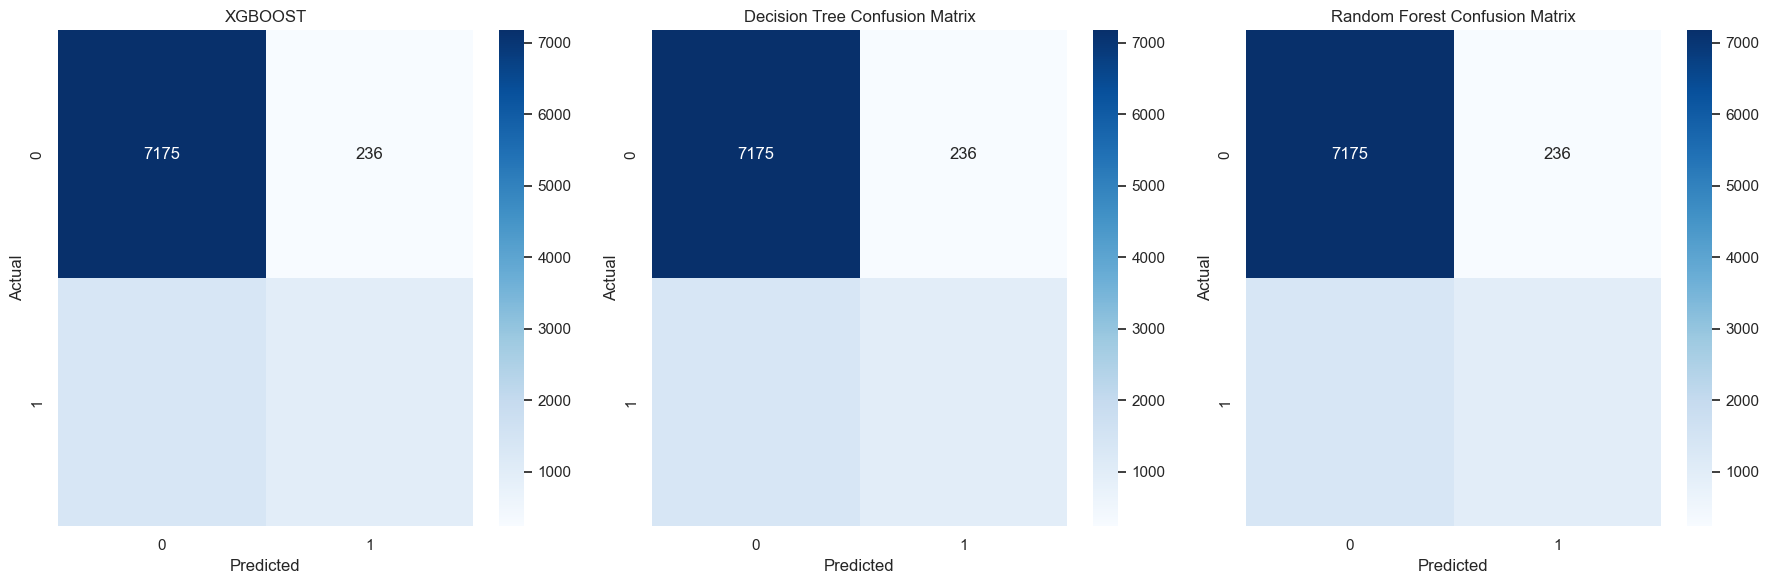

In [361]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrices
cm_xgb = confusion_matrix(Y_test, y_pred)
cm_dt = confusion_matrix(Y_test, y_pred)
cm_rf = confusion_matrix(Y_test, y_pred)

# Step 2: Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# XGBOOST Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('XGBOOST')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Random Forest Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Accuracy of Models

In [353]:
def print_score(model, name):
    model.fit(X_train, Y_train)
    print('Accuracy score of the', name, f': on train = {model.score(X_train, Y_train)*100:.2f}%, on test = {model.score(X_test, Y_test)*100:.2f}%')
print_score(DecisionTreeClassifier(), 'Decision Tree Classifier')
print_score(XGBClassifier(),'XGBOOST')
print_score(RandomForestClassifier(), 'Random Forest Classifier')

Accuracy score of the Decision Tree Classifier : on train = 99.99%, on test = 80.67%
Accuracy score of the XGBOOST : on train = 89.90%, on test = 83.67%
Accuracy score of the Random Forest Classifier : on train = 99.98%, on test = 85.35%


# Tuning RandomForestClassifier To Improve Performance 

## **Hyperparameters for Optimization**

In [354]:
params_grid = {
    "n_estimators":[50,100,150,200,250],
    "max_features":[1,2,3,4,5],
    "max_depth":[4,6,8]
}
grid_search = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = params_grid
)

In [355]:
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [356]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 4, 'n_estimators': 50}

In [358]:
g=grid_search.best_score_
percentage_value = f"{g:.0%}"
print(percentage_value)

86%


In [359]:
RandomForest_Tune = RandomForestClassifier(max_depth = 8, max_features = 4, n_estimators = 50).fit(X_train,Y_train)
print(f'Accuracy score of the RandomForrest: on train = {RandomForest_Tune.score(X_train, Y_train)*100:.2f}%, on test = {RandomForest_Tune.score(X_test, Y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on train = 85.83%, on test = 85.80%


# SAVE THE MODELS

In [362]:
# Save models
joblib.dump(xgb_model, 'XGB_Classifier_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(g, 'random_forest_model.pkl')

# Optionally, save the best parameters for the Random Forest model
with open('best_rf_params.txt', 'w') as f:
    f.write(str(grid_search.best_params_))

print("Models saved successfully.")

Models saved successfully.


## Best Performing Model
**Random Forest** is the best performing model with an ROC-AUC score of **87%**.

### Reasons:
1. **ROC-AUC Score**: The ROC-AUC score measures the model's ability to distinguish between the positive and negative classes. A score of 1.0 indicates perfect discrimination, while 0.5 indicates no discrimination (similar to random guessing). The higher the score, the better the model performs.

2. **Comparison**:
   - Random Forest outperformed both Logistic Regression and Decision Tree, indicating it is better at predicting the target variable (income) based on the features provided.
   - The Decision Tree has the lowest ROC-AUC score (0.78), suggesting it struggles more with the classification task compared to the other two models.

3. **Model Robustness**: Random Forest, being an ensemble method, tends to be more robust against overfitting compared to a single Decision Tree. It combines multiple decision trees to improve overall performance and accuracy.

## Model Performance

After tuning and evaluating the models, the following performance metrics were observed:

### Random Forest Model
- **Accuracy**: 85%
- **F1-Score**: 67% (for income > $50K)
- **ROC-AUC Score**: 87%

### Decision Tree Model
- **Accuracy**: 80.61%
- **F1-Score**: 60% (for income > $50K)
- **ROC-AUC Score**: 74%

### XGBOOST Classifier Model
- **Accuracy**: 83.67%
- **F1-Score**: 55% (for income > $50K)
- **ROC-AUC Score**: 87%

The confusion matrix helped visualize how well each model differentiated between income levels, providing insights into true positives, true negatives, false positives, and false negatives for each classification.

## Insights

Key insights from the data exploration include:
- **Education Level**: There is a significant impact of education level on income prediction, with higher education correlating with a greater likelihood of earning above $50K.
- **Work Hours**: The number of hours worked per week also plays a critical role; individuals working more hours are more likely to have higher incomes.
- **Age**: Age affects income, with certain age groups more likely to earn above $50K, indicating potential career progression over time.

## Recommendations

1. **Feature Engineering**: Further exploration of interaction effects between features (e.g., age and education) may yield additional insights.
2. **Model Improvement**: Consider using advanced ensemble methods or neural networks for potentially better performance.
3. **Data Collection**: Additional features such as geographical data or industry-specific variables could improve predictions.
4. **Regular Updates**: Continuously update the model with new data to maintain its relevance and accuracy over time.

### **Reference**

Youthrive Data Science Class Explanation Sheets and Video Class Recordings.
